In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import math
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
'''
A1. DEVELOP A PERCEPTRON FOR AND GATE LOGIC
    Identify no. of epochs needed to reach converged learning
    Plot no. of epochs against error values after each epoch
'''
# making a dataframe to store the truth table of AND gate
# will use this df as training data
AND= { 
    'A': [0,0,1,1],
    'B': [0,1,0,1],
    'Z': [0,0,0,1]
}

AND_df = pd.DataFrame(AND)
print(AND_df)
A_B = AND_df.iloc[0:, 0:2]  # extracting A & B values
Z = AND_df.iloc[0:, 2]      # extracting Z values

#converting to numpy array
inputs=np.array(A_B)
outputs=np.array(Z)

   A  B  Z
0  0  0  0
1  0  1  0
2  1  0  0
3  1  1  1


In [3]:
# initializing values according to the question
alpha_initial=0.05
W0_initial = 10
W1_initial = 0.2
W2_initial = -0.75

In [4]:
#function to implement step function
#if x<0, y=0
#if x>=0, y=1
def step(sum):
    if(sum <= 0):
        return 0
    else:
        return 1

In [5]:
def perceptron(activation_function):
    #the given values for w0,w1,w2 and learning rate
    alpha=0.05
    W0 = 10
    W1 = 0.2
    W2 = -0.75

    epochs = range(1,1001) # no. of epochs varying from 1 to 1000
    ssq_errors = [] # to store the error value corresponding to no. of epochs
    point_of_convergence=0
    for i in epochs:
        sum_square_error = 0
        for j in range(0,4): #for each set of inputs A and B. (4 rows)
            a = inputs[j][0]
            b = inputs[j][1]
            # print("a = ", a)
            # print("b = ", b)
            summation = (W0)+(W1*a)+(W2*b)  # calculating sum according to perceptron diagram
            target = outputs[j]             
            if (activation_function(summation)==0):
                prediction = 0
            else:
                prediction = 1

            error_temp = target - prediction  # Ei = Ti - Pi
            # print("target=",target)
            # print("prediction=",prediction)
            sum_square_error += error_temp * error_temp  # square of error
            # print("sum_square_error=",sum_square_error)
            delta_W = -(alpha)*(target - prediction) # delta_W = -(alpha)(Ti-Pi)
            # print("delta_W=",delta_W)
            # delta_Wi = -(alpha)(Ti-Pi)(Xi)
            # Wi = Wi + delta_Wi
            W0 = W0 + (alpha*error_temp* 1)
            W1 = W1 + (alpha*error_temp* a)
            W2 = W2 + (alpha*error_temp* b)
            # print("W0=",W0)
            # print("W1=",W1)
            # print("W2=",W2,"\n")
        ssq_errors.append(sum_square_error) #store values of error

        if(sum_square_error <= 0.002):
            print("The learning has converged at epoch ", i)
            point_of_convergence=i
            break
    # print("Sum square errors : \n",ssq_errors)
    return (epochs, ssq_errors, point_of_convergence)

print("Step function: ")
print("\nInitial weights: \nW0=",W0_initial)
print("W1=",W1_initial)
print("W2=",W2_initial)
print("learning rate=",alpha_initial)
step_epochs, step_ssq_errors, step_point_of_convergence = perceptron(step)
print("Sum square errors : \n",step_ssq_errors)

Step function: 

Initial weights: 
W0= 10
W1= 0.2
W2= -0.75
learning rate= 0.05
The learning has converged at epoch  130
Sum square errors : 
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 2, 1, 0]


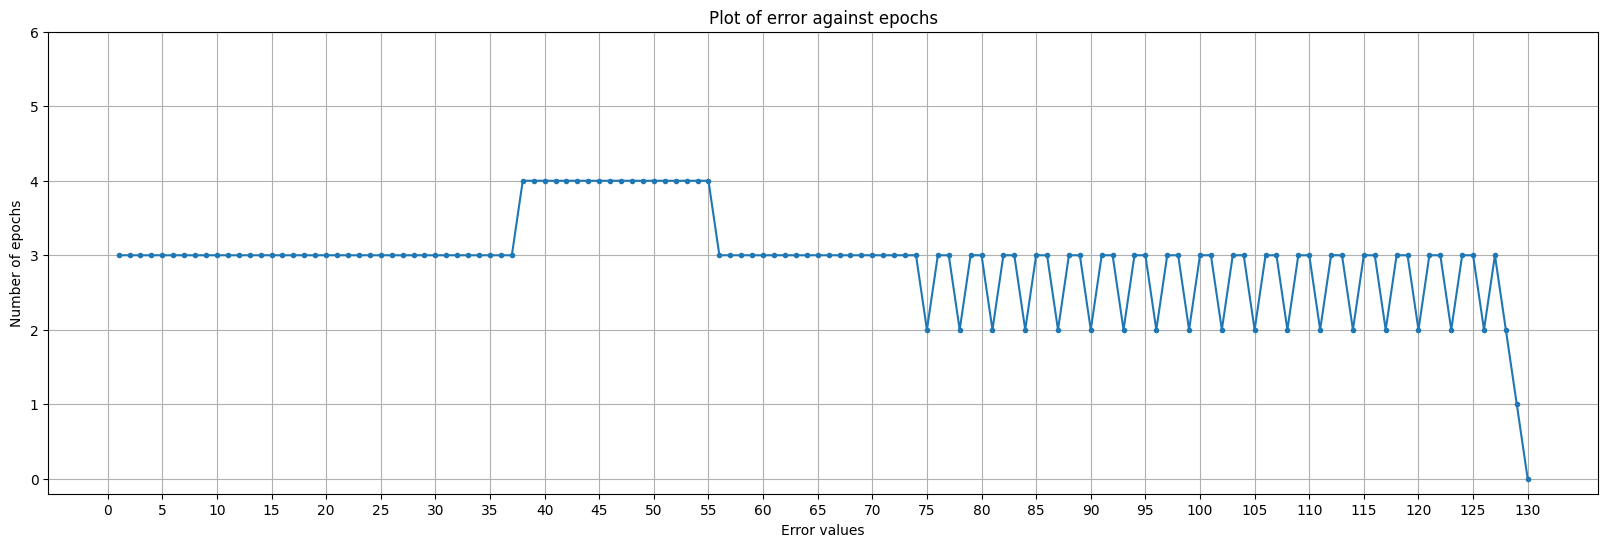

In [6]:
# Plotting the sum-square error values against no. of epochs
mp.figure(figsize=(20,6))
mp.plot(step_epochs[0:step_point_of_convergence] ,step_ssq_errors, marker='.') #let x axis show the no. of epochs and y axis shows the error values
mp.xticks(range(0,step_point_of_convergence+1,5))
mp.yticks([0,1,2,3,4,5,6])
mp.xlabel("Error values")
mp.ylabel("Number of epochs")
mp.title("Plot of error against epochs")
mp.grid(True)
mp.show()

In [7]:
# A2. Repeat the above A1 experiment with following activation functions. Compare the iterations
# taken to converge against each of the activation functions. Keep the learning rate same as A1.
# • Bi-Polar Step function
# • Sigmoid function
# • ReLU function

In [8]:
#BI-POLAR STEP FUNCTION
def bipolar_step(sum):
    if( sum > 0 ):
        return 1
    elif( sum == 0 ):
        return 0
    elif( sum < 0 ):
        return -1
print("\nInitial weights: \nW0=",W0_initial)
print("W1=",W1_initial)
print("W2=",W2_initial)
print("learning rate=",alpha_initial)    
bipolar_epochs, bipolar_ssq_errors, bipolar_point_of_convergence=perceptron(bipolar_step)
print("Sum square errors of each epoch: \n",bipolar_ssq_errors)
#using same method for bi-polar step function as the activation function


Initial weights: 
W0= 10
W1= 0.2
W2= -0.75
learning rate= 0.05
Sum square errors of each epoch: 
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [9]:
#SIGMOID FUNCTION
def sigmoid(sum):
    result = 1/(1+math.exp(-sum))
    return result

print("\nInitial weights: \nW0=",W0_initial)
print("W1=",W1_initial)
print("W2=",W2_initial)
print("learning rate=",alpha_initial)  
sigmoid_epochs, sigmoid_ssq_errors, sigmoid_point_of_convergence=perceptron(sigmoid)
print("Sum square errors of each epoch: \n",sigmoid_ssq_errors)
#using same method for sigmoid function as the activation function


Initial weights: 
W0= 10
W1= 0.2
W2= -0.75
learning rate= 0.05
Sum square errors of each epoch: 
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [10]:
#ReLU FUNCTION
def ReLU(sum):
    if(sum>0):
        return sum
    else:
        return 0
print("\nInitial weights: \nW0=",W0_initial)
print("W1=",W1_initial)
print("W2=",W2_initial)
print("learning rate=",alpha_initial)  
relu_epochs, relu_ssq_errors, relu_point_of_convergence=perceptron(ReLU)
print("Sum square errors : \n",relu_ssq_errors)
#using same method for ReLU function as the activation function


Initial weights: 
W0= 10
W1= 0.2
W2= -0.75
learning rate= 0.05
The learning has converged at epoch  130
Sum square errors : 
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 2, 1, 0]


In [11]:
# A3. Repeat A1 with varying learning rates, keeping the initial weights as the same. 
# Learning rates = {0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1}. 
# Plot the no. of iterations till convergence vs. the learning rate

converge_points=[]
learning_rates=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

def vary_alpha(alpha):
    #the given values for w0,w1,w2
    W0 = 10
    W1 = 0.2
    W2 = -0.75
    converges=[]
    epochs = range(1,1001) # no. of epochs varying from 1 to 1000
    point_of_convergence= -1
    for i in epochs:
        sum_square_error = 0
        for j in range(0,4): #for each set of inputs A and B. (4 rows)
            a = inputs[j][0]
            b = inputs[j][1]
            summation = (W0)+(W1*a)+(W2*b)  # calculating sum according to perceptron diagram
            target = outputs[j]            

            if (step(summation)==0):    #prediction 
                prediction = 0
            else:
                prediction = 1

            error_temp = target - prediction  # Ei = Ti - Pi
            sum_square_error += error_temp * error_temp  # square of error
            delta_W = -(alpha)*(target - prediction) # delta_W = -(alpha)(Ti-Pi)
            # delta_Wi = -(alpha)(Ti-Pi)(Xi)
            # Wi = Wi + delta_Wi
            W0 = W0 + (alpha*error_temp* 1)
            W1 = W1 + (alpha*error_temp* a)
            W2 = W2 + (alpha*error_temp* b)

        if(sum_square_error <= 0.002):
            print("The learning has converged at epoch ", i)  
            point_of_convergence=i #storing the no. of iterations it took for the learning to converge
            break
    return (point_of_convergence)

for alpha_new in learning_rates:
    print("learning rate=",alpha_new)
    converge_pt = vary_alpha(alpha_new)    #calling the function for each value of alpha from 0.1 to 1
    converge_points.append(converge_pt)


learning rate= 0.1
The learning has converged at epoch  68
learning rate= 0.2
The learning has converged at epoch  37
learning rate= 0.3
The learning has converged at epoch  23
learning rate= 0.4
The learning has converged at epoch  23
learning rate= 0.5
The learning has converged at epoch  20
learning rate= 0.6
The learning has converged at epoch  19
learning rate= 0.7
The learning has converged at epoch  15
learning rate= 0.8
The learning has converged at epoch  14
learning rate= 0.9
The learning has converged at epoch  13
learning rate= 1
The learning has converged at epoch  14


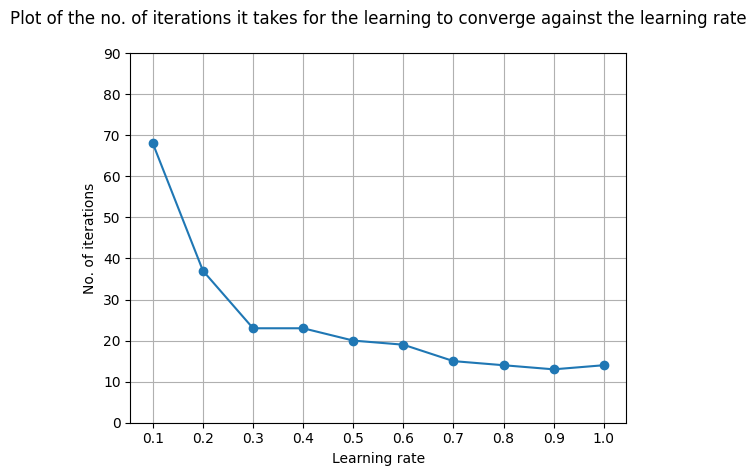

In [12]:
# Plotting the no. of iterations it takes for the learning to converge against the learning rate
mp.plot(learning_rates, converge_points, marker='o') #let x axis show the learning rate and y axis shows the no. of iterations
mp.xticks(learning_rates)
mp.yticks(range(0,100,10))
mp.xlabel("Learning rate")   #label for X axis
mp.ylabel("No. of iterations")   #label for Y axis
mp.title("Plot of the no. of iterations it takes for the learning to converge against the learning rate\n")
mp.grid(True)
mp.show()

In [13]:
'''
A4. Repeat the above exercises, A1 to A3, for XOR gate logic.
'''

XOR= { 
    'A': [0,0,1,1],
    'B': [0,1,0,1], 
    'Z': [0,1,1,0]
}  # making a dict to store the truth table of XOR gate

XOR_df = pd.DataFrame(XOR)  # will use this df as training data
print("XOR gate truth table:\n",XOR_df)
XOR_AB = XOR_df.iloc[0:, 0:2]  # extracting A & B values
XOR_Z = XOR_df.iloc[0:, 2]      # extracting Z values

#converting to numpy array
XOR_inputs=np.array(XOR_AB)
XOR_outputs=np.array(XOR_Z)

XOR gate truth table:
    A  B  Z
0  0  0  0
1  0  1  1
2  1  0  1
3  1  1  0


In [14]:
def perceptron_XOR(activation_function):
    #the given values for w0,w1,w2 and learning rate
    alpha=0.05
    W0 = 10
    W1 = 0.2
    W2 = -0.75

    epochs = range(1,1001) # no. of epochs varying from 1 to 1000
    ssq_errors = [] # to store the error value corresponding to no. of epochs
    point_of_convergence=0
    for i in epochs:
        sum_square_error = 0
        for j in range(0,4): #for each set of inputs A and B. (4 rows)
            a = XOR_inputs[j][0]
            b = XOR_inputs[j][1]
            summation = (W0)+(W1*a)+(W2*b)  # calculating sum according to perceptron diagram
            target = XOR_outputs[j]             
            if (activation_function(summation)==0):
                prediction = 0
            else:
                prediction = 1

            error_temp = target - prediction  # Ei = Ti - Pi
            sum_square_error += error_temp * error_temp  # square of error
            delta_W = -(alpha)*(target - prediction) # delta_W = -(alpha)(Ti-Pi)
            
            W0 = W0 + (alpha*error_temp* 1)
            W1 = W1 + (alpha*error_temp* a)
            W2 = W2 + (alpha*error_temp* b)
            
        ssq_errors.append(sum_square_error) #store values of error

        if(sum_square_error <= 0.002):
            print("The learning has converged at epoch ", i+1)
            point_of_convergence=i
            break
    # print("Sum square errors : \n",ssq_errors)
    return (epochs, ssq_errors, point_of_convergence)

print("Step function: ")
print("\nInitial weights: \nW0=",W0_initial)
print("W1=",W1_initial)
print("W2=",W2_initial)
print("learning rate=",alpha_initial)
XOR_step_epochs, XOR_step_ssq_errors, XOR_step_point_of_convergence = perceptron_XOR(step)
print("Sum square errors : \n",XOR_step_ssq_errors)

Step function: 

Initial weights: 
W0= 10
W1= 0.2
W2= -0.75
learning rate= 0.05
Sum square errors : 
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 

In [15]:
# (A2. Repeat the above A1 experiment with following activation functions.)
# • Bi-Polar Step function
# • Sigmoid function
# • ReLU function

In [16]:
#BI-POLAR STEP FUNCTION
print("\nInitial weights: \nW0=",W0_initial)
print("W1=",W1_initial)
print("W2=",W2_initial)
print("learning rate=",alpha_initial)    
XOR_bipolar_epochs, XOR_bipolar_ssq_errors, XOR_bipolar_point_of_convergence=perceptron_XOR(bipolar_step)
print("Sum square errors : \n",XOR_bipolar_ssq_errors)
#using same method for bi-polar step function as the activation function


Initial weights: 
W0= 10
W1= 0.2
W2= -0.75
learning rate= 0.05
Sum square errors : 
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

In [17]:
#SIGMOID FUNCTION
print("\nInitial weights: \nW0=",W0_initial)
print("W1=",W1_initial)
print("W2=",W2_initial)
print("learning rate=",alpha_initial)  
XOR_sigmoid_epochs, XOR_sigmoid_ssq_errors, XOR_sigmoid_point_of_convergence=perceptron_XOR(sigmoid)
print("Sum square errors : \n",XOR_sigmoid_ssq_errors)
#using same method for sigmoid function as the activation function


Initial weights: 
W0= 10
W1= 0.2
W2= -0.75
learning rate= 0.05
Sum square errors : 
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

In [18]:
#ReLU FUNCTION
print("\nInitial weights: \nW0=",W0_initial)
print("W1=",W1_initial)
print("W2=",W2_initial)
print("learning rate=",alpha_initial)  
XOR_relu_epochs, XOR_relu_ssq_errors, XOR_relu_point_of_convergence=perceptron_XOR(ReLU)
print("Sum square errors : \n",XOR_relu_ssq_errors)
#using same method for bi-polar step function as the activation function


Initial weights: 
W0= 10
W1= 0.2
W2= -0.75
learning rate= 0.05
Sum square errors : 
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4

In [19]:
# A3 Plot the no. of iterations till convergence vs. the learning rate
# Learning rates = {0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1}. 

XOR_converge_points=[]
XOR_learning_rates=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

def XOR_vary_alpha(alpha):
    #the given values for w0,w1,w2
    W0 = 10
    W1 = 0.2
    W2 = -0.75
    converges=[]
    epochs = range(1,1001) # no. of epochs varying from 1 to 1000
    point_of_convergence= -1
    for i in epochs:
        sum_square_error = 0
        for j in range(0,4): #for each set of inputs A and B. (4 rows)
            a = XOR_inputs[j][0]
            b = XOR_inputs[j][1]
            summation = (W0)+(W1*a)+(W2*b)  # calculating sum according to perceptron diagram
            target = XOR_outputs[j]            

            if (step(summation)==0):    #prediction 
                prediction = 0
            else:
                prediction = 1

            error_temp = target - prediction  # Ei = Ti - Pi
            sum_square_error += error_temp * error_temp  # square of error
            delta_W = -(alpha)*(target - prediction) # delta_W = -(alpha)(Ti-Pi)
            # delta_Wi = -(alpha)(Ti-Pi)(Xi)
            # Wi = Wi + delta_Wi
            W0 = W0 + (alpha*error_temp* 1)
            W1 = W1 + (alpha*error_temp* a)
            W2 = W2 + (alpha*error_temp* b)

        if(sum_square_error <= 0.002):
            print("The learning has converged at epoch ", i)  
            point_of_convergence=i #storing the no. of iterations it took for the learning to converge
            break
    return (point_of_convergence)

for XOR_alpha_new in XOR_learning_rates:
    print("learning rate=",XOR_alpha_new)
    XOR_converge_pt = XOR_vary_alpha(XOR_alpha_new)    #calling the function for each value of alpha from 0.1 to 1
    XOR_converge_points.append(XOR_converge_pt)

print("points of convergence: ", XOR_converge_points)
print(" convergence error condition is not met. ")

learning rate= 0.1
learning rate= 0.2
learning rate= 0.3
learning rate= 0.4
learning rate= 0.5
learning rate= 0.6
learning rate= 0.7
learning rate= 0.8
learning rate= 0.9
learning rate= 1
points of convergence:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
 convergence error condition is not met. 


In [20]:
''' 
A5. Build a perceptron for the customer data 
& learn to classify the transactions as high or low value. 
Use sigmoid as the activation function. 
Initialize the weights & learning rate with your choice.
'''
customer_data = {
    'Candies': [20, 16, 27, 19, 24, 22, 15, 18, 21, 16],
    'Mangoes': [6, 3, 6, 1, 4, 1, 4, 4, 1, 2],
    'Milk Packets': [2, 6, 2, 2, 2, 5, 2, 2, 4, 4],
    'Payment': [386, 289, 393, 110, 280, 167, 271, 274, 148, 198],
    'High Value': ['Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No']
}

customer = pd.DataFrame(customer_data)
print(customer)

   Candies  Mangoes  Milk Packets  Payment High Value
0       20        6             2      386        Yes
1       16        3             6      289        Yes
2       27        6             2      393        Yes
3       19        1             2      110         No
4       24        4             2      280        Yes
5       22        1             5      167         No
6       15        4             2      271        Yes
7       18        4             2      274        Yes
8       21        1             4      148         No
9       16        2             4      198         No


In [21]:
#label encoding high value column, yes=1, no=0
customer_encoded = customer.copy()
customer_encoded = customer_encoded.replace('Yes',1)
customer_encoded = customer_encoded.replace('No',0)
print(customer_encoded)

   Candies  Mangoes  Milk Packets  Payment  High Value
0       20        6             2      386           1
1       16        3             6      289           1
2       27        6             2      393           1
3       19        1             2      110           0
4       24        4             2      280           1
5       22        1             5      167           0
6       15        4             2      271           1
7       18        4             2      274           1
8       21        1             4      148           0
9       16        2             4      198           0


In [22]:
#normalizing the data
customer_encoded[['Candies', 'Mangoes', 'Milk Packets', 'Payment']] = (customer_encoded[['Candies', 'Mangoes', 'Milk Packets', 'Payment']] - customer_encoded[['Candies', 'Mangoes', 'Milk Packets', 'Payment']].mean()) / customer_encoded[['Candies', 'Mangoes', 'Milk Packets', 'Payment']].std()
print(customer_encoded)

    Candies   Mangoes  Milk Packets   Payment  High Value
0  0.052303  1.449138     -0.721840  1.408427           1
1 -0.993749 -0.103510      1.903032  0.391928           1
2  1.882894  1.449138     -0.721840  1.481783           1
3 -0.209210 -1.138608     -0.721840 -1.483879           0
4  1.098355  0.414039     -0.721840  0.297614           1
5  0.575329 -1.138608      1.246814 -0.886555           0
6 -1.255262  0.414039     -0.721840  0.203300           1
7 -0.470723  0.414039     -0.721840  0.234738           1
8  0.313816 -1.138608      0.590596 -1.085663           0
9 -0.993749 -0.621059      0.590596 -0.561694           0


In [23]:
XTrain = np.array(customer_encoded.iloc[0: , 0:4])    # filtering out the observation matrix
YTrain = np.array(customer_encoded.iloc[0: , 4])  # filtering out the class labels
alpha_c=0.01
wt0,wt1,wt2,wt3,wt4 = 0.5, 0.1, 0.2, 0.3, 0.4   #assigning initial weights, bias =w0 = 0.5

#will be using sigmoid function which was already defined earlier
def customer_perceptron(wt0,wt1,wt2,wt3,wt4,alpha):
    epochs = range(1,1001) # no. of epochs varying from 1 to 1000
    ssq_errors = [] # to store the error value corresponding to no. of epochs
    point_of_convergence=0
    for i in epochs:
        sum_square_error = 0
        for j in range(0,10): #for each set of inputs (10 rows)
            a = XTrain[j][0]
            b = XTrain[j][1]
            c = XTrain[j][2]
            d = XTrain[j][3]

            summation = (wt0)+(wt1*a)+(wt2*b)+(wt3*c)+(wt4*d)  # calculating sum according to perceptron diagram
            target = YTrain[j]             
            if (ReLU(summation)==0):
                prediction = 0
            else:
                prediction = 1

            error_temp = target - prediction  # Ei = Ti - Pi
            # print("target=",target)
            # print("prediction=",prediction)
            sum_square_error += error_temp * error_temp  # square of error
            # print("sum_square_error=",sum_square_error)
            delta_W = -(alpha)*(target - prediction) # delta_W = -(alpha)(Ti-Pi)
            # print("delta_W=",delta_W)
            # delta_Wi = -(alpha)(Ti-Pi)(Xi)
            # Wi = Wi + delta_Wi
            wt0 = wt0 + (alpha*error_temp* 1)
            wt1 = wt1 + (alpha*error_temp* a)
            wt2 = wt2 + (alpha*error_temp* b)
            wt3 = wt3 + (alpha*error_temp* c)
            wt4 = wt4 + (alpha*error_temp* d)
            # print("wt0 =", wt0)
            # print("wt1 =", wt1)
            # print("wt2 =", wt2)
            # print("wt3 =", wt3)
            # print("wt4 =", wt4,"\n")
        ssq_errors.append(sum_square_error) #store values of error

        if(sum_square_error <= 0.002):
            print("The learning has converged at epoch ", i)
            point_of_convergence=i
            break
    # print("Sum square errors : \n",ssq_errors)
    return (ssq_errors, point_of_convergence, wt0,wt1,wt2,wt3,wt4)

print("Perceptron model for customer data ")
print("\nInitial weights: \nwt0=",wt0)
print("wt1=",wt1)
print("wt2=",wt2)
print("wt3=",wt3)
print("wt4=",wt4,"\n")
print("learning rate=",alpha_c)
customer_ssq_errors, customer_point_of_convergence, new_wt0, new_wt1, new_wt2, new_wt3, new_wt4 = customer_perceptron(wt0,wt1,wt2,wt3,wt4,alpha_c)
print("Sum square errors with each epoch : \n",customer_ssq_errors)
print("\nUpdated weights: \nwt0=",new_wt0)
print("wt1=",new_wt1)
print("wt2=",new_wt2)
print("wt3=",new_wt3)
print("wt4=",new_wt4,"\n")

Perceptron model for customer data 

Initial weights: 
wt0= 0.5
wt1= 0.1
wt2= 0.2
wt3= 0.3
wt4= 0.4 

learning rate= 0.01
The learning has converged at epoch  6
Sum square errors with each epoch : 
 [3, 2, 2, 2, 1, 0]

Updated weights: 
wt0= 0.3999999999999999
wt1= 0.10784539049223708
wt2= 0.29315885051121787
wt3= 0.20812948575544055
wt4= 0.47765212145498276 



In [24]:
''' 
A6: COMPARE perceptron results to pseudo inverse results
'''
# Making predictions to compare with that of the pseudo inverse matrix
perceptron_predictions=[]
for r in range(0,10): #for each set of inputs (10 rows)
    candies = XTrain[r][0]
    mangoes = XTrain[r][1]
    milk = XTrain[r][2]
    payment = XTrain[r][3]
    summation_data = (new_wt0)+(new_wt1*candies)+(new_wt2*mangoes)+(new_wt3*milk)+(new_wt4*payment)  # calculating sum according to perceptron diagram
            
    if (ReLU(summation_data)==0):
        perceptron_predictions.append(0)
    else:
        perceptron_predictions.append(1)


In [25]:
#Pseudo Inverse predictions
matrix_A = np.array(customer_encoded.iloc[0:, 0:4])   #filtering out the observation matrix
matrix_C = np.array(customer_encoded.iloc[0:, 4]) #filtering out the class label matrix
pseudo_inverse = np.linalg.pinv(matrix_A)
matrix_X = np.array(np.dot(pseudo_inverse,matrix_C))  #calculating X matrix

#we know that A.X=C
Xpredictions=np.array(np.dot(matrix_A,matrix_X))
print("Predictions obtained using pseudo inverse matrix:")
print(list(Xpredictions))
pseudo_predictions=[]
for v in list(Xpredictions):
    pseudo_predictions.append(step(v))
print("Values after passing through step function:")
print(pseudo_predictions)


Predictions obtained using pseudo inverse matrix:
[0.6843416823784378, 0.14496608270318564, 0.5203544038808631, -0.5958500795093903, 0.06918725971054529, -0.5543139715108125, 0.2800280463502842, 0.20974778413703793, -0.5681593408436718, -0.19030186729647922]
Values after passing through step function:
[1, 1, 1, 0, 1, 0, 1, 1, 0, 0]


In [26]:
#COMPARING PERCEPTRON PREDICTIONS AND PSEUDO INVERSE PREDICTIONS
print("Actual values:")
print(list(YTrain))
print("Perceptron predictions:")
print(perceptron_predictions)
print("Pseudo inverse predictions:")
print(pseudo_predictions)
print("We can see that both of them produce accurate results.")

Actual values:
[1, 1, 1, 0, 1, 0, 1, 1, 0, 0]
Perceptron predictions:
[1, 1, 1, 0, 1, 0, 1, 1, 0, 0]
Pseudo inverse predictions:
[1, 1, 1, 0, 1, 0, 1, 1, 0, 0]
We can see that both of them produce accurate results.


In [27]:
''' 
A10. Learn using a MLP network from Sci-Kit
repeat the AND Gate and XOR Gate exercises using MLPClassifier() function.
'''
# AND GATE
X_and = AND_df.iloc[0:, 0:2]
Y_and = AND_df.iloc[0:, 2]
#splitting the data into training and testing sets
X_and_train, X_and_test, Y_and_train, Y_and_test = train_test_split(X_and, Y_and, test_size=0.5)
Y_and_test = pd.DataFrame(Y_and_test)

mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='lbfgs', max_iter=1000)
mlp.fit(X_and, Y_and)   #training the model using the truth table
preds= mlp.predict(X_and_test)  #predicting output of testing data
print("X testing data: \n",X_and_test)
print("Y testing data: \n",Y_and_test)
print("Prediction :\n",preds)

mlp_accuracy = accuracy_score(Y_and_test, preds)        #calculating the accuracy
mlp_report = classification_report(Y_and_test, preds)   #calculating the precision, recall, f1-score

print("Accuracy of the MLP classifier:", mlp_accuracy)
print("Classification Report:\n",mlp_report)

X testing data: 
    A  B
2  1  0
0  0  0
Y testing data: 
    Z
2  0
0  0
Prediction :
 [0 0]
Accuracy of the MLP classifier: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [28]:
# OR GATE
X_xor = XOR_df.iloc[0:, 0:2]
Y_xor = XOR_df.iloc[0:, 2]
#splitting the data into training and testing sets
X_xor_train, X_xor_test, Y_xor_train, Y_xor_test = train_test_split(X_xor, Y_xor, test_size=0.5)
Y_xor_test = pd.DataFrame(Y_xor_test)

mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='lbfgs', max_iter=1000)
mlp.fit(X_xor, Y_xor)   #training the model using the truth table
xor_preds= mlp.predict(X_xor_test)  #predicting output of testing data
print("X testing data: \n",X_xor_test)
print("Y testing data: \n",Y_xor_test)
print("Prediction :\n",xor_preds)

xor_accuracy = accuracy_score(Y_xor_test, xor_preds)        #calculating the accuracy
xor_report = classification_report(Y_xor_test, xor_preds)   #calculating the precision, recall, f1-score

print("Accuracy of the MLP classifier:", xor_accuracy)
print("Classification Report:\n", xor_report)

X testing data: 
    A  B
0  0  0
1  0  1
Y testing data: 
    Z
0  0
1  1
Prediction :
 [0 1]
Accuracy of the MLP classifier: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

